In [2]:
# Importing required packages
import os
import networkx as nx
from scipy.io import mmread
import matplotlib.pyplot as plt
import pandas as pd
from random import sample, seed
import seaborn as sns
import scipy.stats as stats
import numpy as np

#### Loading the Karate dataset edge. Let’s call this “Network A”

C:\Users\sumer\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


No. of nodes in Network A is 34
No. of edges in Network A is 78


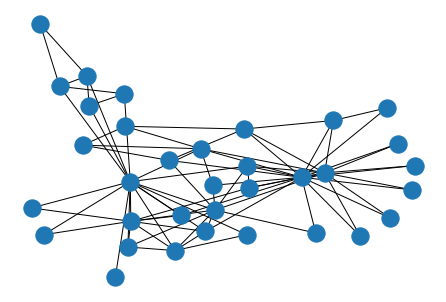

In [3]:
os.chdir("D:\\OneDrive\\NUS\\Core Modules\\Semester 2\\DSC5104 - Introduction to Network Science & Analytics\\Assignments\\Assignments\\soc-karate")

# Creating and plotting the network
edges = mmread('soc-karate.mtx')

network_a = nx.from_scipy_sparse_matrix(edges)
nx.draw(network_a)

print("No. of nodes in Network A is",nx.number_of_nodes(network_a))
print("No. of edges in Network A is",nx.number_of_edges(network_a))

#### Creating a random (network) sample. Let’s call this Network Asample”

No. of nodes in Network A is 17
No. of edges in Network A is 22
Network A is connected: True
Network A_sample is connected: True


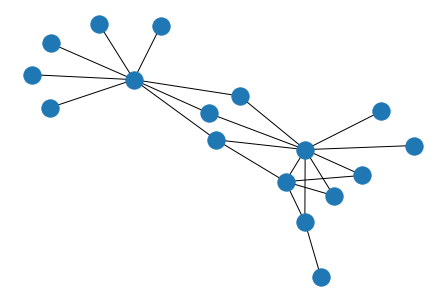

In [4]:
seed(321)
nodes = list(network_a.nodes)
k = len(nodes)

if k % 2 == 0:
    v_sample =  sample(nodes, k//2)
else:
    v_sample = sample(nodes, (k + 1)//2)
    
network_a_sample = network_a.subgraph(v_sample)
nx.draw(network_a_sample)

print("No. of nodes in Network A is",nx.number_of_nodes(network_a_sample))
print("No. of edges in Network A is",nx.number_of_edges(network_a_sample))

print("Network A is connected:",nx.is_connected(network_a))
print("Network A_sample is connected:",nx.is_connected(network_a_sample))   # check if the sample graph is connected


#### Comparing “Network Asample” with “Network A” in terms of any 3 graph-level metrics: Graph Density, Diameter and Degree Distribution

Comparison Metric 1: Graph Density
Graph density of Network A: 0.139
Graph density of Network A_sample: 0.1618


Comparison Metric 2: Diameter
Diameter of Network A: 5
Diameter of Network A_sample: 5


Comparison Metric 3: Degree Distribution


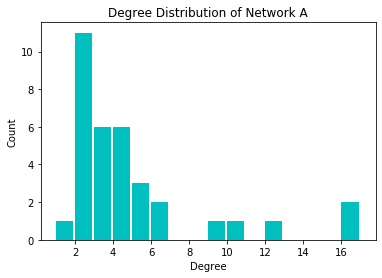

Maximum degree = 17
Median degree = 3.0


Comparison Metric 3: Degree Distribution


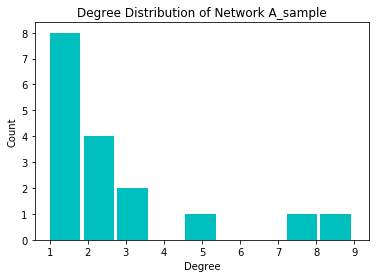

Maximum degree = 9
Median degree = 2.0


In [5]:
print("Comparison Metric 1: Graph Density")
print("Graph density of Network A:", round(nx.density(network_a),4))
print("Graph density of Network A_sample:",round(nx.density(network_a_sample),4))

print("\n")
print("Comparison Metric 2: Diameter")
print("Diameter of Network A:",nx.diameter(network_a))
print("Diameter of Network A_sample:",nx.diameter(network_a_sample))

print("\n")
print("Comparison Metric 3: Degree Distribution")
degree = list(dict(network_a.degree()).values())
plt.hist(degree, bins = 16, color = 'c', width=0.9)
plt.title("Degree Distribution of Network A")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()
print("Maximum degree =", max(degree))
print("Median degree =", np.median(degree))

print("\n")
print("Comparison Metric 3: Degree Distribution")
degree_s = list(dict(network_a_sample.degree()).values())
plt.hist(degree_s, bins = 9, color = 'c', width=0.8)
plt.title("Degree Distribution of Network A_sample")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()
print("Maximum degree =", max(degree_s))
print("Median degree =", np.median(degree_s))

#### Generating followling node-level metrics for all nodes in “Network A”
- Degree
- Closeness
- Clustering coefficient
- Page Rank
- Eccentricity

In [6]:
metrics = pd.DataFrame()

for n in nodes:
    metrics.loc[n, 'degree'] = network_a.degree[n]
    metrics.loc[n, 'closeness'] = nx.closeness_centrality(network_a, n)
    metrics.loc[n, 'cluster_coeff'] = nx.clustering(network_a, n)
    metrics.loc[n, 'page_rank'] = nx.pagerank(network_a)[n]
    metrics.loc[n, 'eccentricity'] = nx.eccentricity(network_a, n)

metrics

,degree,closeness,cluster_coeff,page_rank,eccentricity
0,16.0,0.568966,0.150000,0.097002,3.0
1,9.0,0.485294,0.333333,0.052878,3.0
2,10.0,0.559322,0.244444,0.057078,3.0
3,6.0,0.464789,0.666667,0.035861,3.0
4,3.0,0.379310,0.666667,0.021979,4.0
5,4.0,0.383721,0.500000,0.029113,4.0
6,4.0,0.383721,0.500000,0.029113,4.0
7,4.0,0.440000,1.000000,0.024491,4.0
8,5.0,0.515625,0.500000,0.029765,3.0
9,2.0,0.434211,0.000000,0.014309,4.0


#### Computing the Pearson’s correlation among the 5 node-level metrics

                 degree  closeness  cluster_coeff  page_rank  eccentricity
degree         1.000000   0.771591      -0.515168   0.997903     -0.453188
closeness      0.771591   1.000000      -0.612168   0.742256     -0.761673
cluster_coeff -0.515168  -0.612168       1.000000  -0.513786      0.543483
page_rank      0.997903   0.742256      -0.513786   1.000000     -0.431516
eccentricity  -0.453188  -0.761673       0.543483  -0.431516      1.000000


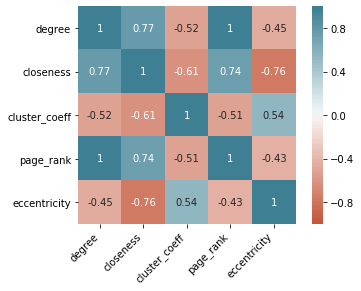

In [7]:
corr_matrix = metrics.corr(method ='pearson')
print(corr_matrix)

hm = sns.heatmap(
        corr_matrix, 
        annot = True,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
)

hm.set_xticklabels(
                hm.get_xticklabels(),
                rotation=45,
                horizontalalignment='right'
);

#### Creating a random graph with same number of nodes and edges as the Network A. Assumptions - undirected and no loops exist. Lets's call this 𝑁𝑒𝑡𝑤𝑜𝑟𝑘𝑟𝑎𝑛𝑑𝑜𝑚.

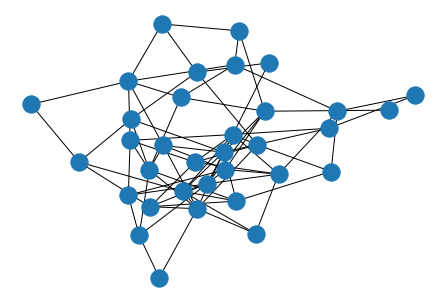

In [8]:
seed(123)
network_random = nx.gnm_random_graph(34, 78, seed=None, directed=False)
nx.draw(network_random)

##### Re-computing the 3 graph-level metrics for 𝑁𝑒𝑡𝑤𝑜𝑟𝑘𝑟𝑎𝑛𝑑𝑜𝑚 as your network. We observe if metrics significantly different from the metrics originally computed

Comparison Metric 1: Graph Density
Graph density of Network random: 0.139


Comparison Metric 2: Diameter
Diameter of Network random: 4


Comparison Metric 3: Degree Distribution


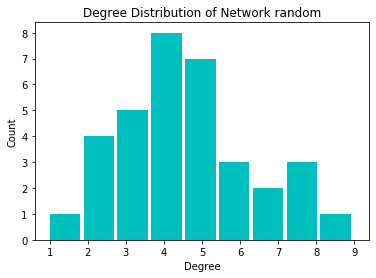

Maximum degree = 9
Median degree = 4.0


In [9]:
print("Comparison Metric 1: Graph Density")
print("Graph density of Network random:",round(nx.density(network_random),4))
print("\n")

print("Comparison Metric 2: Diameter")
print("Diameter of Network random:",nx.diameter(network_random))
print("\n")

print("Comparison Metric 3: Degree Distribution")
degree_r = list(dict(network_random.degree()).values())
plt.hist(degree_r, bins = 9, color = 'c', width=0.8)
plt.title("Degree Distribution of Network random")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

print("Maximum degree =", max(degree_r))
print("Median degree =", np.median(degree_r))

#### Re-computing the 5 node-level metrics using 𝑁𝑒𝑡𝑤𝑜𝑟𝑘𝑟𝑎𝑛𝑑𝑜𝑚 as your network. Again, we observe if the metrics significantly different from the metrics originally computed

In [10]:
metrics_random = pd.DataFrame()

for n in nodes:
    metrics_random.loc[n, 'degree'] = network_random.degree[n]
    metrics_random.loc[n, 'closeness'] = nx.closeness_centrality(network_random, n)
    metrics_random.loc[n, 'cluster_coeff'] = nx.clustering(network_random, n)
    metrics_random.loc[n, 'page_rank'] = nx.pagerank(network_random)[n]
    metrics_random.loc[n, 'eccentricity'] = nx.eccentricity(network_random, n)

metrics_random

,degree,closeness,cluster_coeff,page_rank,eccentricity
0,7.0,0.478261,0.047619,0.041698,4.0
1,6.0,0.440000,0.066667,0.039363,3.0
2,7.0,0.471429,0.238095,0.040676,4.0
3,5.0,0.440000,0.300000,0.030692,4.0
4,5.0,0.440000,0.000000,0.030333,4.0
5,9.0,0.515625,0.194444,0.052680,3.0
6,4.0,0.402439,0.166667,0.026145,4.0
7,1.0,0.317308,0.000000,0.010101,4.0
8,4.0,0.428571,0.000000,0.026124,4.0
9,4.0,0.383721,0.000000,0.028165,4.0


#### Statistical tests to test for statistical significance of the difference between two sets of metrics

In [32]:
# Degree

data1 = list(dict(network_a.degree()).values())
data2 = list(dict(network_random.degree()).values())
F, p = stats.f_oneway(data1, data2)
print("p-value for significance is: ", p)
if p<0.05:
    print("The metrics are significantly different")
else:
    print("The metrics are not significantly different")
    
print("\n")    
print("Mean Degree Network A:", np.mean(data1))
print("Mean Degree Network random:",np.mean(data2))

p-value for significance is:  1.0
The metrics are not significantly different


Mean Degree Network A: 4.588235294117647
Mean Degree Network random: 4.588235294117647


In [33]:
# Closeness

data1 = list(dict(nx.closeness_centrality(network_a)).values())
data2 = list(dict(nx.closeness_centrality(network_random)).values())
F, p = stats.f_oneway(data1, data2)
print("p-value for significance is: ", p)
if p<0.05:
    print("The metrics are significantly different")
else:
    print("The metrics are not significantly different")
    
print("\n")    
print("Mean Closeness Network A:", np.mean(data1))
print("Mean Closeness Network random:", np.mean(data2))

p-value for significance is:  0.6531597715839195
The metrics are not significantly different


Mean Closeness Network A: 0.4264796325735234
Mean Closeness Network random: 0.41957867206029625


In [34]:
# Clustering

data1 = list(dict(nx.clustering(network_a)).values())
data2 = list(dict(nx.clustering(network_random)).values())
F, p = stats.f_oneway(data1, data2)
print("p-value for significance is: ", p)
if p<0.05:
    print("The metrics are significantly different")
else:
    print("The metrics are not significantly different")

print("\n")    
print("Mean Clustering Network A:", np.mean(data1))
print("Mean Clustering Network random:", np.mean(data2))

p-value for significance is:  6.332389874493971e-10
The metrics are significantly different


Mean Clustering Network A: 0.5706384782076823
Mean Clustering Network random: 0.1161531279178338


In [37]:
# Page Rank

data1 = list(dict(nx.pagerank(network_a)).values())
data2 = list(dict(nx.pagerank(network_random)).values())
F, p = stats.f_oneway(data1, data2)
print("p-value for significance is: ", p)
if p<0.05:
    print("The metrics are significantly different")
else:
    print("The metrics are not significantly different")

print("\n")    
print("Mean Page Rank Network A:", np.mean(data1))
print("Mean Page Rank Network random:", np.mean(data2))

p-value for significance is:  1.0
The metrics are not significantly different


Mean Page Rank Network A: 0.029411764705882353
Mean Page Rank Network random: 0.029411764705882353


In [38]:
# Eccentricity

data1 = list(dict(nx.eccentricity(network_a)).values())
data2 = list(dict(nx.eccentricity(network_random)).values())
F, p = stats.f_oneway(data1, data2)
print("p-value for significance is: ", p)
if p<0.05:
    print("The metrics are significantly different")
else:
    print("The metrics are not significantly different")
    
print("\n")    
print("Mean Eccentricity Network A:", np.mean(data1))
print("Mean Eccentricity Network random:", np.mean(data2))

p-value for significance is:  0.10156285206637064
The metrics are not significantly different


Mean Eccentricity Network A: 4.029411764705882
Mean Eccentricity Network random: 3.7941176470588234
